In [1]:
import cv2
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model, model_from_json
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML
from tensorflow.python.keras.preprocessing import image
from PIL import Image
from scipy.misc import toimage
%matplotlib inline

In [2]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model, model_from_json, load_model
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras import initializers
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

In [8]:
z = 0
img = cv2.imread('H:/plates_Serg/8538766.jpg')
symb = ['0','1','2','3','4','5','6','7','8','9','A','B','C','E','H','K','M','P','T','X','У','*']
json_file = open("Model90.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("Model90.h5")
stepSize = 2
width = 28
roi = img[0:height,z:z+width]
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
im1 = ax1.imshow(tmp, animated=True) 
im2 = ax2.imshow(roi, animated=True)  
im3 = ax3.plot(scalex=symb)
def update(*args):
    global z
    while z + width < img.shape[1]:
        z+=stepSize
        roi = img[0:height,z:z+width]
        im2.set_array(roi)
        im1.set_array(img)
        roi = cv2.resize(roi,(18,18))
        return ax1,ax2
anim = animation.FuncAnimation(fig, update,interval=100)
rc('animation', html='jshtml')
rc
HTML(anim.to_jshtml())

NameError: name 'height' is not defined

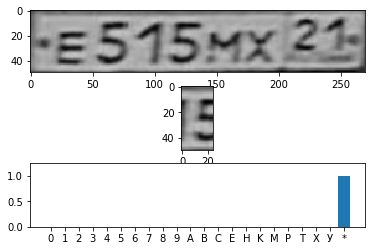

In [9]:
###Тест
z = 0
img = cv2.imread('cropped2.jpg')
img = cv2.resize(img,(270,50))
symb = ['0','1','2','3','4','5','6','7','8','9','A','B','C','E','H','K','M','P','T','X','У','*']
json_file = open("NewDatModLast.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("NewDatModLast.h5")
modh,modw = 18,18
stepSize = 1
width = 25
roi = img[0:img.shape[0],z:z+width]
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
im1 = ax1.imshow(img, animated=True) 
im2 = ax2.imshow(roi, animated=True)  
im3 = ax3.bar(x=symb,height=1.2)
def update(*args):
    global z
    while z + width < img.shape[1]:
        z+=stepSize
        roi = img[0:img.shape[0],z:z+width]
        im2.set_array(roi)
        roi = cv2.resize(roi,(modh,modw))
        roi = np.reshape(roi,[1,modh,modw,3])
        Y = loaded_model.predict(roi)
        for rect,yi in zip(im3,Y[0]):
            rect.set_height(float(yi))
        im1.set_array(img)
        return ax1,ax2,ax3
anim = animation.FuncAnimation(fig, update,interval=100)
rc('animation', html='jshtml')
rc
HTML(anim.to_jshtml())